<a href="https://colab.research.google.com/github/jpupkies/Jim-Pupkies/blob/master/Gemini_Context_Grounded_Question_Answering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Step 1 — New Notebook Scaffold

# Gemini Context-Grounded Question Answering

## Overview
This notebook demonstrates a deterministic, quota-safe question answering pipeline using the Google Gemini API.  
The model is explicitly constrained to answer **only** from provided context and must return a refusal when the answer cannot be found.

## Key Features
- Context-bounded question answering
- Explicit hallucination prevention rules
- Deterministic, reproducible prompt construction
- Quota-safe simulation mode
- Optional live Gemini API execution
- Structured pandas outputs for evaluation

## Skills Demonstrated
- Prompt engineering for controlled generation
- Rule-based LLM behavior enforcement
- API-safe execution patterns
- NLP evaluation via structured outputs
- Production-minded notebook design


# Step 2 — Sample Data (pandas)

In [1]:
import pandas as pd

# Context-grounded QA data – more relevant to professional scenarios
data = [
    {
        "context": (
            "Acme Corp’s HR policy states that all full-time employees are eligible "
            "for health, dental, and vision benefits starting on their first day."
        ),
        "question": "When do employees become eligible for benefits?",
        "expected_behavior": "answer"
    },
    {
        "context": (
            "The company maintains an internal knowledge base with procedures "
            "for IT ticket submissions, onboarding, and internal software usage."
        ),
        "question": "What is the budget for next quarter?",
        "expected_behavior": "refusal"
    },
    {
        "context": (
            "Acme Corp uses a tiered performance review system. "
            "Managers submit quarterly feedback which contributes to end-of-year evaluations."
        ),
        "question": "Who approves the company-wide bonus allocations?",
        "expected_behavior": "refusal"
    },
    {
        "context": (
            "The IT department provides access to email, cloud storage, and VPN accounts. "
            "New hires must complete security training before gaining VPN access."
        ),
        "question": "What must a new hire complete before accessing VPN?",
        "expected_behavior": "answer"
    }
]

df = pd.DataFrame(data)
df

,context,question,expected_behavior
0,Acme Corp’s HR policy states that all full-tim...,When do employees become eligible for benefits?,answer
1,The company maintains an internal knowledge ba...,What is the budget for next quarter?,refusal
2,Acme Corp uses a tiered performance review sys...,Who approves the company-wide bonus allocations?,refusal
3,"The IT department provides access to email, cl...",What must a new hire complete before accessing...,answer


### Step 2 — Sample Data (pandas)

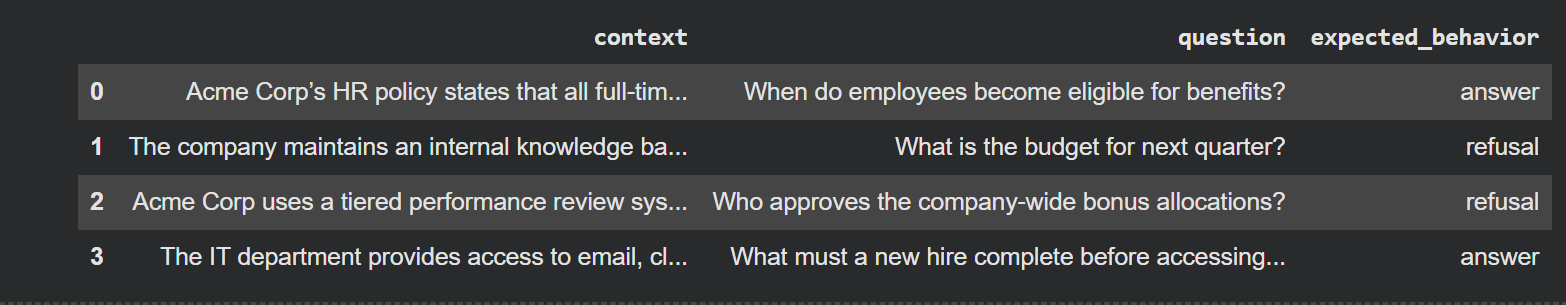

In [14]:
from IPython.display import display, Image, Markdown

# Screenshot
screenshots = [
    ("Step 2 — Sample Data (pandas)", r"/content/screenshots/Step 2 - Sample Data pandas.png"),
]

# Display screenshot with caption
for caption, path in screenshots:
    display(Markdown(f"### {caption}"))
    display(Image(filename=path))


# Step 3 — Prompt Construction

In [2]:
# Prompt construction function
def construct_prompt(context: str, question: str) -> str:
    """
    Builds a deterministic, context-grounded prompt for Gemini.

    Rules enforced:
    - Answer ONLY based on the provided context.
    - If the answer cannot be found in the context, explicitly respond with:
      "The answer cannot be determined from the provided context."
    """
    prompt = (
        "You are a professional assistant. Answer the user's question using ONLY the context below. "
        "Do not infer, guess, or use external knowledge. "
        "If the answer cannot be found in the context, respond exactly with:\n"
        "'The answer cannot be determined from the provided context.'\n\n"
        f"Context:\n{context}\n\n"
        f"Question:\n{question}\n\n"
        "Answer:"
    )
    return prompt

# Example usage
example_context = df.loc[0, "context"]
example_question = df.loc[0, "question"]

print(construct_prompt(example_context, example_question))

You are a professional assistant. Answer the user's question using ONLY the context below. Do not infer, guess, or use external knowledge. If the answer cannot be found in the context, respond exactly with:
'The answer cannot be determined from the provided context.'

Context:
Acme Corp’s HR policy states that all full-time employees are eligible for health, dental, and vision benefits starting on their first day.

Question:
When do employees become eligible for benefits?

Answer:


### Step 3 — Prompt Construction

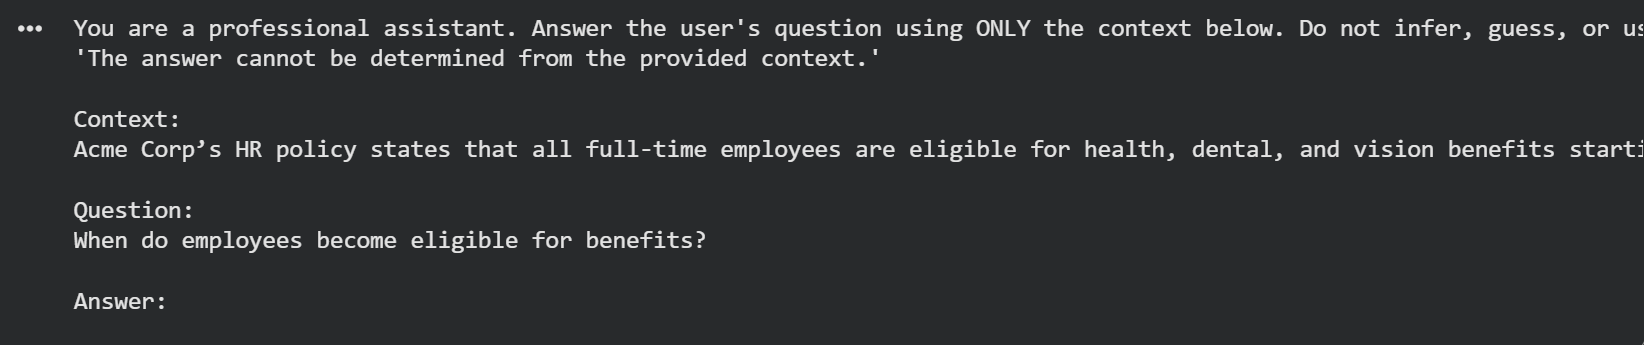

In [15]:
# Screenshot
screenshots = [
    ("Step 3 — Prompt Construction", r"/content/screenshots/Step 3 - Prompt Construction.png"),
]

for caption, path in screenshots:
    display(Markdown(f"### {caption}"))
    display(Image(filename=path))


# Step 4 — Simulation Mode Execution

In [3]:
# Step 4: Simulation Mode Execution
simulation_mode = True  # Set to False to enable live Gemini API

def simulate_gemini_response(prompt: str, expected_behavior: str) -> str:
    """
    Simulates Gemini's response based on expected_behavior.
    In live mode, this function would call the Gemini API instead.
    """
    if simulation_mode:
        if expected_behavior == "answer":
            return "Simulated correct answer from context."
        elif expected_behavior == "refusal":
            return "The answer cannot be determined from the provided context."
    else:
        # Placeholder for live Gemini API call using google-generativeai SDK
        # Example:
        # import google.generativeai as genai
        # response = genai.TextGeneration.create(model="gemini", prompt=prompt)
        # return response.text
        return "LIVE MODE NOT IMPLEMENTED"

# Apply simulation over the DataFrame
df["prompt"] = df.apply(lambda row: construct_prompt(row["context"], row["question"]), axis=1)
df["simulated_response"] = df.apply(
    lambda row: simulate_gemini_response(row["prompt"], row["expected_behavior"]), axis=1
)

df_results = df[["context", "question", "expected_behavior", "simulated_response"]]
df_results

,context,question,expected_behavior,simulated_response
0,Acme Corp’s HR policy states that all full-tim...,When do employees become eligible for benefits?,answer,Simulated correct answer from context.
1,The company maintains an internal knowledge ba...,What is the budget for next quarter?,refusal,The answer cannot be determined from the provi...
2,Acme Corp uses a tiered performance review sys...,Who approves the company-wide bonus allocations?,refusal,The answer cannot be determined from the provi...
3,"The IT department provides access to email, cl...",What must a new hire complete before accessing...,answer,Simulated correct answer from context.


### Step 4 — Simulation Mode Execution

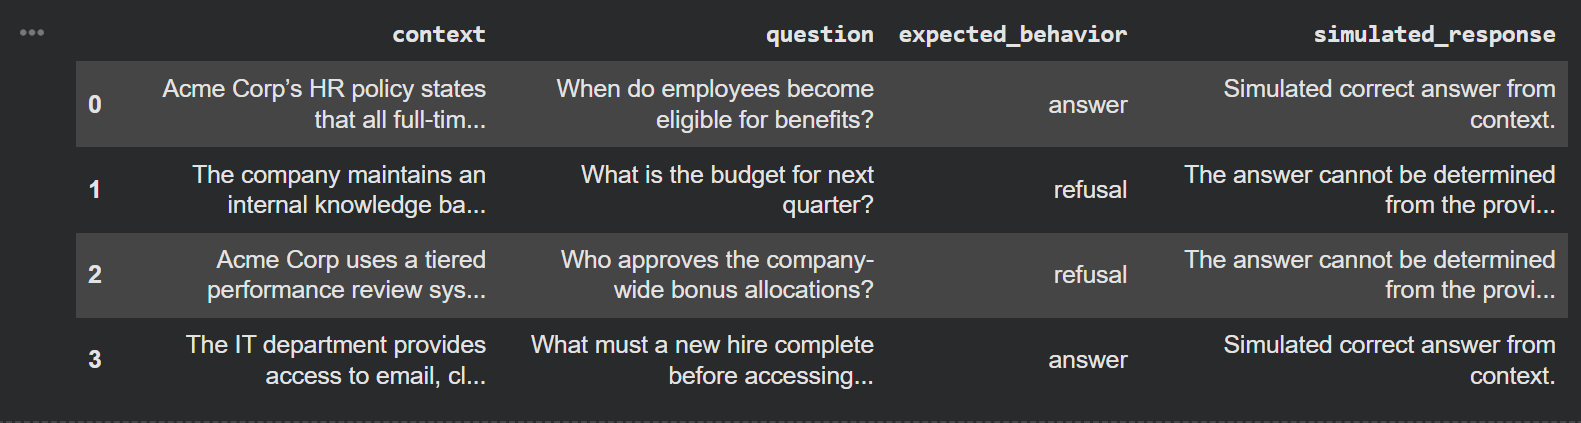

In [16]:
# Screenshot
screenshots = [
    ("Step 4 — Simulation Mode Execution", r"/content/screenshots/Step 4 - Simulation Mode Execution.png"),
]

for caption, path in screenshots:
    display(Markdown(f"### {caption}"))
    display(Image(filename=path))

# Step 5a — Optional Live Gemini Execution

In [4]:
# Step 5a: Optional Live Gemini Execution
live_mode = False  # Set True to run live Gemini API calls

import google.generativeai as genai

def run_gemini_live(prompt: str) -> str:
    """
    Sends the prompt to the Gemini model using the google-generativeai SDK.
    Returns the model's response text.
    """
    if not live_mode:
        return "LIVE MODE OFF"

    response = genai.TextGeneration.create(
        model="gemini",
        prompt=prompt,
        temperature=0.0  # deterministic output
    )
    return response.text

# Example usage on first row
if live_mode:
    print(run_gemini_live(df.loc[0, "prompt"]))

# Step 5b — Apply Live Mode over All Rows

In [5]:
# Step 5b: Apply Live Mode to all rows
df["live_response"] = df["prompt"].apply(run_gemini_live)

# Display results
df_results_live = df[["context", "question", "expected_behavior", "simulated_response", "live_response"]]
df_results_live

,context,question,expected_behavior,simulated_response,live_response
0,Acme Corp’s HR policy states that all full-tim...,When do employees become eligible for benefits?,answer,Simulated correct answer from context.,LIVE MODE OFF
1,The company maintains an internal knowledge ba...,What is the budget for next quarter?,refusal,The answer cannot be determined from the provi...,LIVE MODE OFF
2,Acme Corp uses a tiered performance review sys...,Who approves the company-wide bonus allocations?,refusal,The answer cannot be determined from the provi...,LIVE MODE OFF
3,"The IT department provides access to email, cl...",What must a new hire complete before accessing...,answer,Simulated correct answer from context.,LIVE MODE OFF


### Step 5b — Apply Live Mode over All Rows

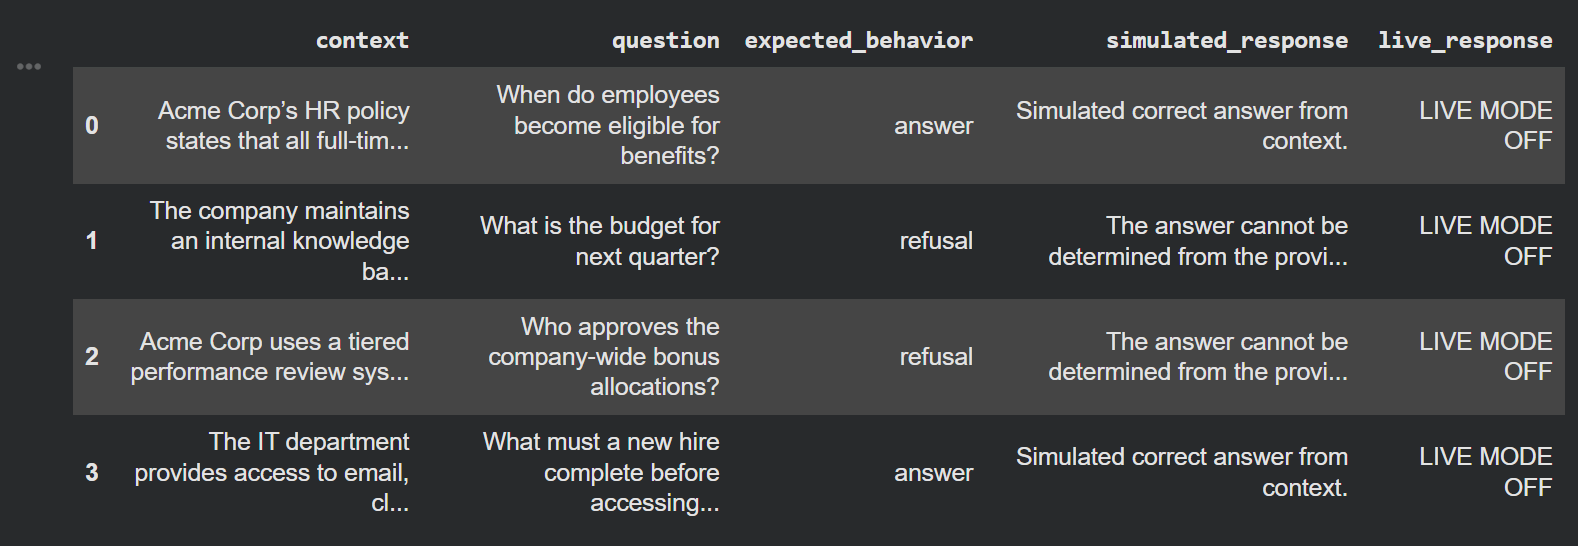

In [17]:
# Screenshot
screenshots = [
    ("Step 5b — Apply Live Mode over All Rows", r"/content/screenshots/Step 5b - Apply Live Mode over All Rows.png"),
]

for caption, path in screenshots:
    display(Markdown(f"### {caption}"))
    display(Image(filename=path))

# Step 6 — Evaluation Column

In [6]:
# Step 6: Evaluation Column

def evaluate_response(response: str, expected_behavior: str) -> str:
    """
    Evaluates whether the response matches the expected behavior.
    Returns 'PASS' if correct, 'FAIL' otherwise.
    """
    if expected_behavior == "answer" and response not in ["The answer cannot be determined from the provided context.", "LIVE MODE OFF"]:
        return "PASS"
    elif expected_behavior == "refusal" and response == "The answer cannot be determined from the provided context.":
        return "PASS"
    else:
        return "FAIL"

# Evaluate simulated responses
df["simulated_eval"] = df.apply(
    lambda row: evaluate_response(row["simulated_response"], row["expected_behavior"]), axis=1
)

# Evaluate live responses (optional)
df["live_eval"] = df.apply(
    lambda row: evaluate_response(row["live_response"], row["expected_behavior"]), axis=1
)

# Final results table
df_results_eval = df[[
    "context", "question", "expected_behavior",
    "simulated_response", "simulated_eval",
    "live_response", "live_eval"
]]
df_results_eval

,context,question,expected_behavior,simulated_response,simulated_eval,live_response,live_eval
0,Acme Corp’s HR policy states that all full-tim...,When do employees become eligible for benefits?,answer,Simulated correct answer from context.,PASS,LIVE MODE OFF,FAIL
1,The company maintains an internal knowledge ba...,What is the budget for next quarter?,refusal,The answer cannot be determined from the provi...,PASS,LIVE MODE OFF,FAIL
2,Acme Corp uses a tiered performance review sys...,Who approves the company-wide bonus allocations?,refusal,The answer cannot be determined from the provi...,PASS,LIVE MODE OFF,FAIL
3,"The IT department provides access to email, cl...",What must a new hire complete before accessing...,answer,Simulated correct answer from context.,PASS,LIVE MODE OFF,FAIL


### Step 6 — Evaluation Column

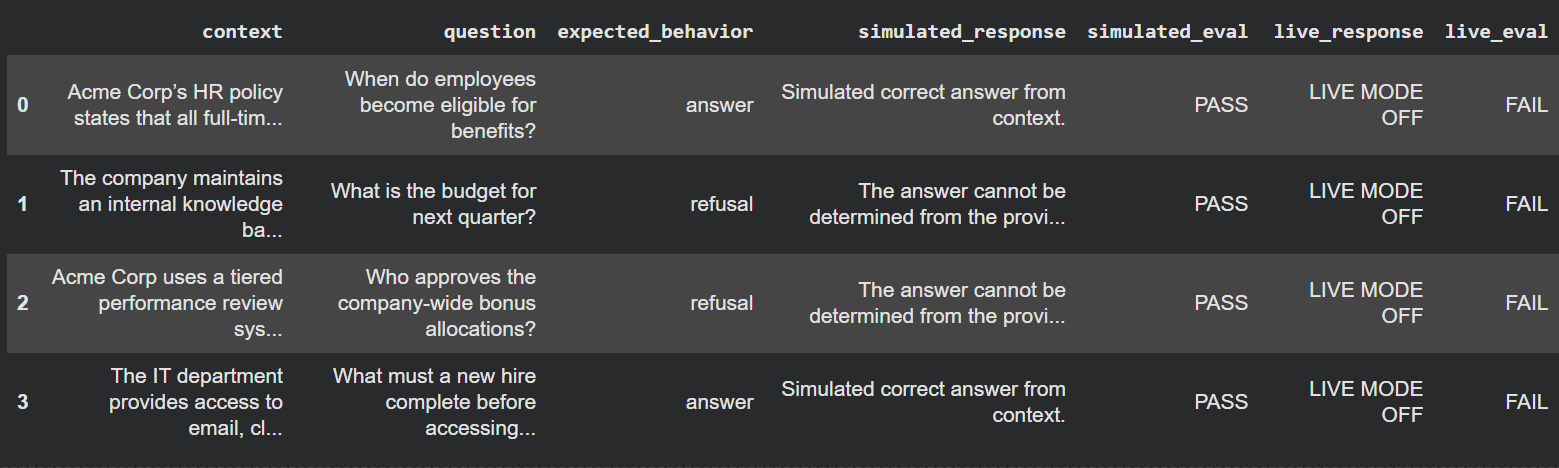

In [18]:
# Screenshot
screenshots = [
    ("Step 6 — Evaluation Column", r"/content/screenshots/Step 6 - Evaluation Column.png"),
]

for caption, path in screenshots:
    display(Markdown(f"### {caption}"))
    display(Image(filename=path))

## Summary & Key Takeaways

This notebook demonstrates **context-grounded question answering** using the Google Gemini API, with a focus on:

- Enforcing answers strictly from provided context
- Explicitly refusing to answer when information is missing
- Deterministic and reproducible prompt construction
- Quota-safe simulation mode with optional live Gemini execution
- Structured evaluation of model outputs using pandas

### Skills Demonstrated
- Prompt engineering for controlled LLM behavior
- API-safe and reproducible execution patterns
- Integration of structured data (pandas) for NLP tasks
- Rule-based validation of model outputs
- Portfolio-ready notebook design with screenshots

### Next Steps / Usage
- Toggle `live_mode = True` to run real Gemini API queries
- Extend the DataFrame with additional contexts and questions for further testing
- Integrate into larger pipelines for document QA, policy validation, or workflow automation